ASSIGNMENT_7

1. Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
X = df.drop('charges',1)
y= df['charges']
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [4]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

2. Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell of what form of predictive analysis that can be conducted on the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

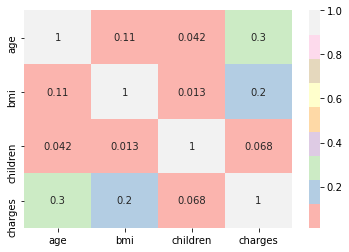

In [7]:
corr =df.corr()
sns.heatmap(corr, annot= True, cmap = 'Pastel1')


Age and charges are highly correlated

In [8]:
duplicate =df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df = df.drop_duplicates()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


3. Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)

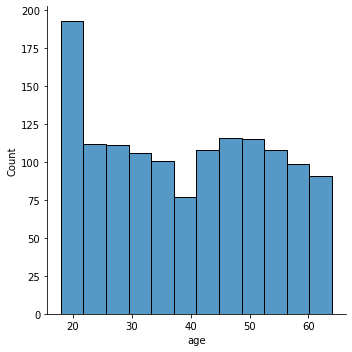

In [10]:
age =df.age
age
sns.displot(age)

4. Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and numerical_discrete’ respectively. 

In [11]:
pd.pandas.set_option('display.max_columns', None)

In [12]:
numerical = [var for var in df.columns if df[var].dtype !='object']
numerical

['age', 'bmi', 'children', 'charges']

In [13]:
df[['age', 'bmi', 'children', 'charges']].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [14]:
for item in numerical:
    if df[item].nunique()< 20:
        print ('{} is discrete'.format(item))
    else:
            pass

children is discrete


In [15]:
numerical_discrete = [var for var in numerical if 'children' in var]
numerical_discrete

['children']

In [16]:
numerical_continuous = [var for var in numerical if var not in numerical_discrete]
numerical_continuous

['age', 'bmi', 'charges']

In [17]:
numerical_continuous.remove('charges')

In [18]:
numerical_continuous

['age', 'bmi']

5. Visually identify if there is presence of any outliers in the numerical_continuous columns and resolve them using a zscore test and a threshold of your choosing.

In [19]:
from matplotlib import pyplot as plt  

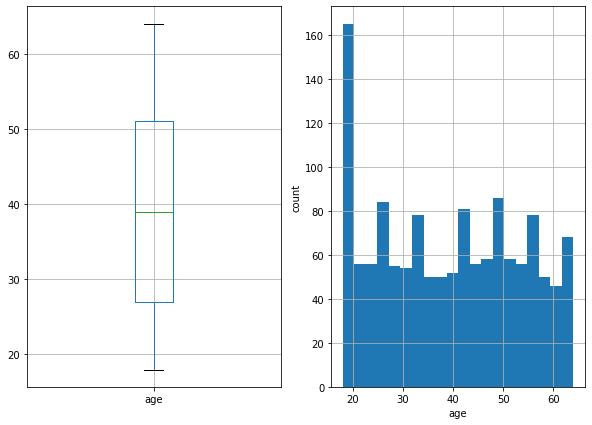

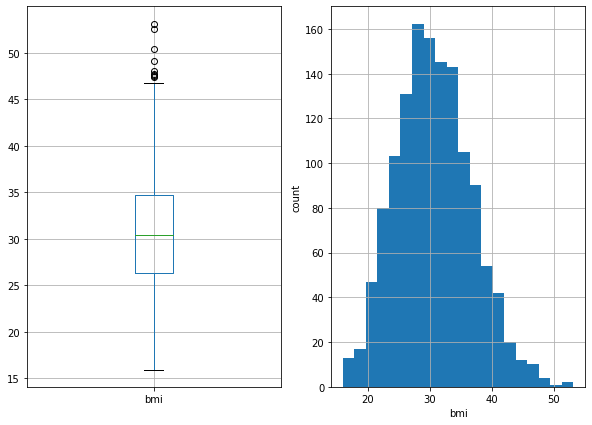

In [20]:
for var in numerical_continuous:
    plt.figure(figsize =(10,7))
    plt.subplot(1,2,1)
    fig = df.boxplot(column = var)
    
    plt.subplot(1,2,2)
    fig = df[var].hist(bins = 20)
    fig.set_ylabel('count')
    fig.set_xlabel(var)

In [21]:
df['zscore_bmi'] = (df.bmi -df.bmi.mean())/df.bmi.std()
df.head()

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-0.452990
1,18,male,33.770,1,no,southeast,1725.55230,0.509231
2,28,male,33.000,3,no,southeast,4449.46200,0.383011
3,33,male,22.705,0,no,northwest,21984.47061,-1.304564
4,32,male,28.880,0,no,northwest,3866.85520,-0.292347


In [22]:
df2 = df[(df.zscore_bmi < -2)|(df.zscore_bmi > 2)]
df2.head(2)

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
28,23,male,17.385,1,no,northwest,2775.19215,-2.176628
116,58,male,49.060,0,no,southeast,11381.32540,3.015596


In [23]:
df_no_bmi_outliers = df[(df.zscore_bmi > -2)&(df.zscore_bmi < 2)]
df_no_bmi_outliers.head()

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-0.452990
1,18,male,33.770,1,no,southeast,1725.55230,0.509231
2,28,male,33.000,3,no,southeast,4449.46200,0.383011
3,33,male,22.705,0,no,northwest,21984.47061,-1.304564
4,32,male,28.880,0,no,northwest,3866.85520,-0.292347


In [24]:
df_no_bmi_outliers.shape

(1280, 8)

In [25]:
df.shape[0] - df_no_bmi_outliers.shape[0]

57

6. Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.

<AxesSubplot:>

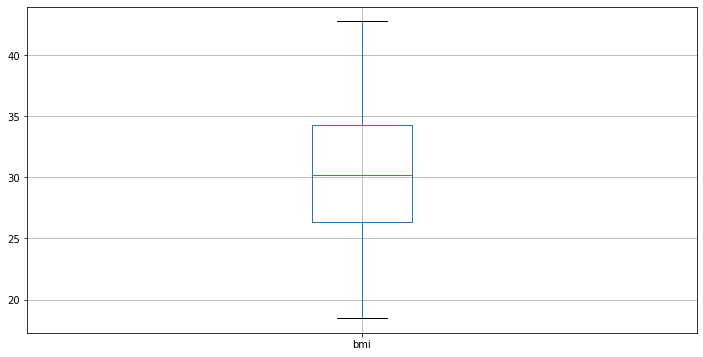

In [26]:
plt.figure(figsize = (12,6))
df_no_bmi_outliers.boxplot(column = 'bmi')

7. Isolate all the categorical column names into a list named ‘categorical'

In [27]:
categorical = [var for var in df.columns if df[var].dtype =='object']
categorical

['sex', 'smoker', 'region']

8. Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.

9. Encode the discrete and categorical features with one of the measures of central tendency of your choosing.

In [28]:
def encode_cat_vars(var, target):
    ordered_labels = df.groupby([var])[target].median().to_dict()
    df[var] = df[var].map(ordered_labels)
    
for var in categorical:
    encode_cat_vars(var, 'charges')
for var in numerical_discrete:
        encode_cat_vars(var, 'charges')
df.head()

,age,sex,bmi,children,smoker,region,charges,zscore_bmi
0,19,9412.9625,27.900,9863.47180,34456.34845,8798.59300,16884.92400,-0.452990
1,18,9377.9047,33.770,8483.87015,7345.72660,9294.13195,1725.55230,0.509231
2,28,9377.9047,33.000,10600.54830,7345.72660,9294.13195,4449.46200,0.383011
3,33,9377.9047,22.705,9863.47180,7345.72660,8976.97725,21984.47061,-1.304564
4,32,9377.9047,28.880,9863.47180,7345.72660,8976.97725,3866.85520,-0.292347


10. Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

In [29]:
X = df.drop('charges',1)
y= df['charges']
X.head()

,age,sex,bmi,children,smoker,region,zscore_bmi
0,19,9412.9625,27.900,9863.47180,34456.34845,8798.59300,-0.452990
1,18,9377.9047,33.770,8483.87015,7345.72660,9294.13195,0.509231
2,28,9377.9047,33.000,10600.54830,7345.72660,9294.13195,0.383011
3,33,9377.9047,22.705,9863.47180,7345.72660,8976.97725,-1.304564
4,32,9377.9047,28.880,9863.47180,7345.72660,8976.97725,-0.292347


In [30]:
import statsmodels.api as sm

In [31]:
X1 =sm.add_constant(X)
model = sm.OLS(y,X1).fit()
model.pvalues

const         5.573211e-01
age           1.583476e-89
sex           7.459860e-01
bmi           6.350661e-01
children      7.749569e-01
smoker        0.000000e+00
region        1.180360e-01
zscore_bmi    5.552992e-01
dtype: float64